In [4]:
import pandas as pd
import os
import glob
import sys
import seaborn as sns
import cv2
import matplotlib.pyplot as plt
import pickle
module_path = "../../src"

if module_path not in sys.path:
    sys.path.append(module_path)
from fechas.utils.preprocessing import generate_df
DATA_PATH = '../../01.Datasets'

In [5]:
classes = []
with open(os.path.join(DATA_PATH,'labeling/classes.txt')) as f:
    classes = f.readlines()
classes      = [i.replace('\n','') for i in classes]
dict_classes = {i+1:classes[i] for i in range(len(classes))}

file_dict = open(os.path.join(DATA_PATH,"data_dict.pkl"), "wb")
pickle.dump(dict_classes, file_dict)
file_dict.close()

print('Classes:\n',classes)
print('Classes dictionary\n',dict_classes)

Classes:
 ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '-', 'date']
Classes dictionary
 {1: '0', 2: '1', 3: '2', 4: '3', 5: '4', 6: '5', 7: '6', 8: '7', 9: '8', 10: '9', 11: '-', 12: 'date'}


In [3]:
df_train = generate_df(DATA_PATH,dict_classes,mode = 'train')
df_train.to_csv(os.path.join(DATA_PATH,'train_date_detection.csv'),index = False)

In [20]:
test_path  = glob.glob(os.path.join(DATA_PATH,'processed/images_test/fechas/*.jpg'))
test_names = [i.split('fechas/')[-1].split('.jpg')[0] for i in test_path] 
df_test    = pd.DataFrame({'filename':test_names,'filename_path':test_path})
df_test.to_csv(os.path.join(DATA_PATH,'test_date_detection.csv'),index = False)

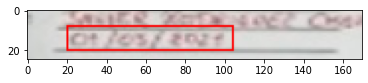

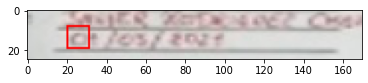

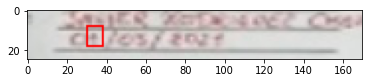

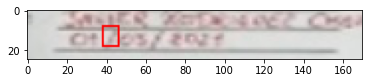

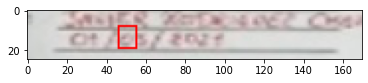

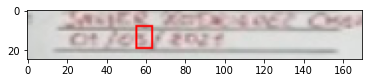

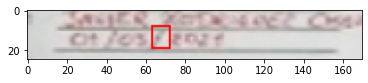

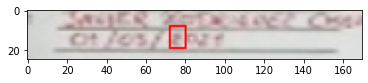

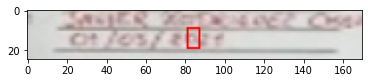

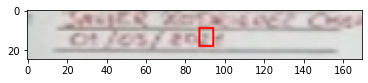

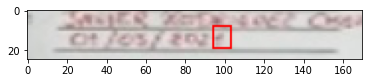

In [5]:
for idx in range(0,11):   
    filename = df_train.iloc[idx]['filename_path']
    img      = plt.imread(filename)
    xmin = int(df_train.iloc[idx]['xmin'])
    ymin = int(df_train.iloc[idx]['ymin'])
    xmax = int(df_train.iloc[idx]['xmax'])
    ymax = int(df_train.iloc[idx]['ymax'])

    start_point = (xmin,ymin)
    end_point = (xmax,ymax)
    color = (255, 0, 0)
    thickness = 1
    img = cv2.rectangle(img, start_point, end_point, color, thickness)
    plt.imshow(img)
    plt.show()